In [6]:
import pandas as pd
import numpy as np
from collections import Counter
import re

In [7]:
df = pd.read_excel('Whatsapp_chat_Data.xlsx')

In [8]:
#df

In [9]:
# Drop NaN values in Dataframe
df = df.dropna()
# Show Dataframe
df

,Mode,Message
0,Angry,Hmme na pagal ho chuki har teacher ki mintaien...
1,Angry,Or phir teachers k krny waly kam b me he kron
2,Sad,Allah kry maan jay ab bus
3,Fear,Abhe aca ki assignments rehti hain
5,Sad,Ab Eid tu guzarny dein sakoon se
...,...,...
14259,Angry,Mery comments or warning ko b importance nai di
14260,Happy,G behn jsa ap kahyn
14268,Happy,Happy Independence Day
14276,Happy,Or shukr h mny uni jany sy phly msg dakh lia


In [10]:
# Change Column value --> from 'fear' to 'Fear' :)
#df["Mode"].replace({"Angry ": "Angry", "fear": "Fear",}, inplace=True)

In [11]:
# Change Column value --> from 'fear' to 'Fear' :)
df["Mode"].replace({"Normal": "Positive", "Happy": "Positive", "Love": "Positive",}, inplace=True)
df["Mode"].replace({"Angry": "Negative", "Fear": "Negative", "Sad": "Negative",}, inplace=True)

In [12]:
# Get the unique values of 'Mode' column
df.Mode.unique()

array(['Negative', 'Positive'], dtype=object)

In [13]:
import matplotlib.pyplot as plt

# a simple line plot
#df.plot(kind='bar',x='Mode',y='Message')
df.groupby('Mode')['Message'].nunique().plot(kind='bar')
plt.show()

<Figure size 640x480 with 1 Axes>

In [14]:
df['Mode'].value_counts()

Positive    1124
Negative     793
Name: Mode, dtype: int64

In [15]:
df["Mode"].replace({"Positive": 0, "Negative": 1,}, inplace=True)

In [16]:
type(df['Mode'][0])

numpy.int64

In [17]:
df

,Mode,Message
0,1,Hmme na pagal ho chuki har teacher ki mintaien...
1,1,Or phir teachers k krny waly kam b me he kron
2,1,Allah kry maan jay ab bus
3,1,Abhe aca ki assignments rehti hain
5,1,Ab Eid tu guzarny dein sakoon se
...,...,...
14259,1,Mery comments or warning ko b importance nai di
14260,0,G behn jsa ap kahyn
14268,0,Happy Independence Day
14276,0,Or shukr h mny uni jany sy phly msg dakh lia


In [18]:
from gensim import corpora,models,similarities
from collections import defaultdict
from sklearn.model_selection import train_test_split

c:\users\hassan raza\appdata\local\programs\python\python37\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [19]:
X = np.asarray(df['Message'])
y = np.asarray(df['Mode'])

In [23]:
X.shape

(1917,)

In [24]:
type(y[0])

numpy.int64

In [25]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,shuffle=True)

In [26]:
#stoplist = set('for a of the and to in'.split(' '))
stoplist = set('a of the or to me e'.split(' '))


texts = [[word for word in re.split('\W+',doc.lower()) if word not in stoplist]
         for doc in Xtrain]


# for doc in Xtrain:
#     word = doc
#     for word in re.split('\W+', doc.lower()):
#         if word in not

#print(texts)

In [27]:
print(len(texts))

1341


In [28]:
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

cutOffValue = 2
processed_corpus = [[token for token in text if frequency[token] > cutOffValue] 
                    for text in texts]

In [29]:
dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

Dictionary(610 unique tokens: ['bna', 'kia', 'tra', 'umar', 'b']...)


In [30]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]

In [31]:
model = models.TfidfModel(bow_corpus)
#model = models.LsiModel(bow_corpus)
#model = models.LdaModel(bow_corpus)

In [32]:
index = similarities.SparseMatrixSimilarity(model[bow_corpus],num_features=len(dictionary))

In [33]:
y_names = ['Positive', 'Negative']

In [34]:
t = np.random.randint(len(Xtest))

#CR = "Acha kia"
#t = np.random.randint(len(CR))

query_document = re.split('\W+',Xtest[t].lower())
query_bow = dictionary.doc2bow(query_document)
sims = index[model[query_bow]]
docNumber = sorted(enumerate(sims), key=lambda x: x[1], reverse=True)[0][0]

#print('Predicted: ', ytrain[docNumber])
#print('Ground Truth:',ytest[t])

print('Predicted:',y_names[ytrain[docNumber]])
print('Ground Truth:',y_names[ytest[t]])

Predicted: Positive
Ground Truth: Positive


In [35]:
vocab = {}

In [36]:
def initializeVocabulary():
    unkToken = '<UNK>'
    #create another vocab inside vocab -> text to index
    vocab['t_2_i'] = {}
    #create another vocab inside vocab -> index to text
    vocab['i_2_t'] = {}
    # Add token in key 'unkToken' = '<UNK>'
    vocab['unkToken'] = unkToken
    # call function 'addToken()' that return token index
    idx = addToken(unkToken)
    vocab['unkTokenIdx'] = idx

In [37]:
def addToken(token):
    # if token already in vocab then just return index
    if token in vocab['t_2_i']:
        idx = vocab['t_2_i'][token]
    else:
        # create index for new tokken --> simply new index == len(vocab) /*last number*/
        idx = len(vocab['t_2_i'])
        vocab['t_2_i'][token] = idx
        vocab['i_2_t'][idx] = token
    return idx

In [38]:
def addManyTokens(tokens):
    idxes = [addToken(token) for token in tokens]
    return idxes

In [39]:
def lookUpToken(token):
    return vocab['t_2_i'].get(token,vocab['unkTokenIdx'])

In [40]:
def lookUpIndex(idx):
    if idx not in vocab['i_2_t']:
        raise KeyError("the index (%d) is not there" % idx)
    return vocab['i_2_t'][idx]

In [41]:
def vocabularyFromDataFrame(df,cutoff=2):
    initializeVocabulary()
    wordCounts = Counter()
    for r in df.review:
        for word in re.split('\W+',r):
            wordCounts[word] += 1
    for word,count in wordCounts.items():
        if count > cutoff:
            addToken(word)

In [42]:
def vocabularyFromCorpus(Corpus,cutoff=2):
    initializeVocabulary()
    wordCounts = Counter()
    for doc in Corpus:
        for word in re.split('\W+',doc):
            wordCounts[word] += 1
    for word,count in wordCounts.items():
        if count > cutoff:
            addToken(word)

In [43]:
def oneHotVector(token,N):
    oneHot = np.zeros((N,1))
    oneHot[lookUpToken(token)] = 1
    return oneHot

In [44]:
def computeFeatures(doc,N):
    isFirst = True
    for token in doc:
        oneHot = oneHotVector(token,N)
        if isFirst:
            xF = oneHot
            isFirst = False
        else:
            xF = np.hstack((xF,oneHot))
    return np.mean(xF,axis=1)[:,np.newaxis]

In [45]:
def computeFeatures_fast(doc,N):
    fv = np.zeros(N)
    numTokens = 0
    for token in doc:
        fv[lookUpToken(token)] += 1
        numTokens += 1
    return fv/numTokens

In [46]:
def corpusToFeatureMatrix(Corpus,N):
    isFirst = True
    for doc in Corpus:
        fv = computeFeatures(doc,N)
        if isFirst:
            fM = fv
            isFirst = False
        else:
            fM = np.hstack((fM,fv))
    return fM.T

In [47]:
def corpusToFeatureMatrix_fast(Corpus,N):
    fM = np.zeros((N,len(Corpus)))
    i = 0
    for doc in Corpus:
        fM[:,i] = computeFeatures_fast(doc,N)
        i+=1
    return fM.T

In [48]:
#X = np.asarray(df['Message'])
#y = np.asarray(df['Mode'])

In [49]:
X[:5], y[:5]

(array(['Hmme na pagal ho chuki har teacher ki mintaien kr kr ky',
        'Or phir teachers k krny waly kam b me he kron',
        'Allah kry maan jay ab bus', 'Abhe aca ki assignments rehti hain',
        'Ab Eid tu guzarny dein sakoon se'], dtype=object),
 array([1, 1, 1, 1, 1], dtype=int64))

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,shuffle=True)

In [52]:
vocabularyFromCorpus(Xtrain)

In [53]:
len(vocab['t_2_i'])

614

In [54]:
N = len(vocab['t_2_i'])
Xtrain_fM = corpusToFeatureMatrix_fast(Xtrain,N)
Xtest_fM = corpusToFeatureMatrix_fast(Xtest,N)

In [55]:
#Xtrain_fM[0]

In [56]:
Xtrain_fM.shape

(1341, 614)

In [57]:
Xtest_fM.shape

(576, 614)

In [58]:
#from sklearn.linear_model import LogisticRegression as clf
from sklearn.naive_bayes import GaussianNB as clf
#from sklearn.ensemble import RandomForestClassifier as clf
#from sklearn.svm import SVC as clf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

In [59]:
M = clf().fit(Xtrain_fM,ytrain)

In [60]:
y_pred = M.predict(Xtest_fM)

In [61]:
#y_pred
Train_Score = M.score(Xtrain_fM, ytrain)
Test_Score  = M.score(Xtest_fM, ytest)
print("> :",Train_Score)
print("> :",Test_Score)

> : 0.6592095451155854
> : 0.6927083333333334


Text(89.18, 0.5, 'Predicted Label')

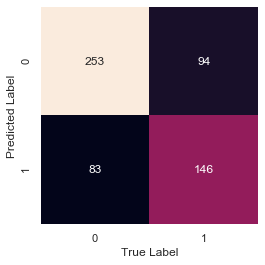

In [62]:
mat = confusion_matrix(ytest,y_pred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
           xticklabels=np.unique(y),yticklabels=np.unique(y))
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

In [63]:
M.score(Xtrain_fM, ytrain)

0.6592095451155854

In [74]:
#clf.score(Xtest, ytest)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       336
           1       0.64      0.61      0.62       240

    accuracy                           0.69       576
   macro avg       0.68      0.68      0.68       576
weighted avg       0.69      0.69      0.69       576



In [73]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [74]:
#data = np.reshape(X, (X.shape[0], X.shape[1], 1))
N = len(vocab['t_2_i'])
new_X = corpusToFeatureMatrix_fast(X,N)
data = np.reshape(new_X, (new_X.shape[0], new_X.shape[1], 1))
data.shape

(1917, 614, 1)

In [75]:
y.shape

(1917,)

In [76]:
x_train,x_test,y_train,y_test = train_test_split(data,y,test_size=0.2,random_state=3)

In [81]:
model=Sequential()

In [82]:
model.add(LSTM((1), batch_input_shape=(None, None, 1),return_sequences=True))
model.add(LSTM((1),return_sequences=False))

In [83]:
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])

In [84]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, None, 1)           12        
_________________________________________________________________
lstm_5 (LSTM)                (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [85]:
history = model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))


Train on 1533 samples, validate on 384 samples
Epoch 1/50
1533/1533 [==============================] - 32s 21ms/step - loss: 6.7606 - acc: 0.5806 - val_loss: 6.2961 - val_acc: 0.6094
Epoch 2/50
1533/1533 [==============================] - 28s 18ms/step - loss: 6.7606 - acc: 0.5806 - val_loss: 6.2961 - val_acc: 0.6094
Epoch 3/50
1533/1533 [==============================] - 31s 20ms/step - loss: 6.7606 - acc: 0.5806 - val_loss: 6.2961 - val_acc: 0.6094
Epoch 4/50
1533/1533 [==============================] - 29s 19ms/step - loss: 6.7606 - acc: 0.5806 - val_loss: 6.2961 - val_acc: 0.6094
Epoch 5/50
1533/1533 [==============================] - 33s 21ms/step - loss: 6.7606 - acc: 0.5806 - val_loss: 6.2961 - val_acc: 0.6094
Epoch 6/50
1533/1533 [==============================] - 33s 21ms/step - loss: 6.7606 - acc: 0.5806 - val_loss: 6.2961 - val_acc: 0.6094
Epoch 7/50
1533/1533 [==============================] - 31s 20ms/step - loss: 6.7606 - acc: 0.5806 - val_loss: 6.2961 - val_acc: 0.6094


KeyboardInterrupt: 

In [107]:
result = model.predict(x_test)

In [121]:
true_label = np.reshape(y_test, (y_test.shape[0], 1)

(384, 1)

In [122]:
#result.shape
#true_label.shape

((384, 1), (384, 1))

In [124]:
#plt.scatter(range(20),result,c='r')
#plt.scatter(range(20),true_label,c='g')
#plt.show

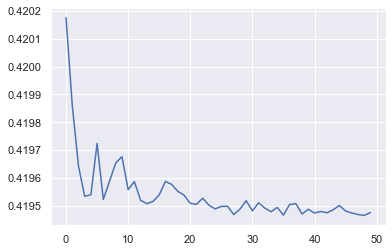

In [113]:
plt.plot(history.history['loss'])
plt.show()

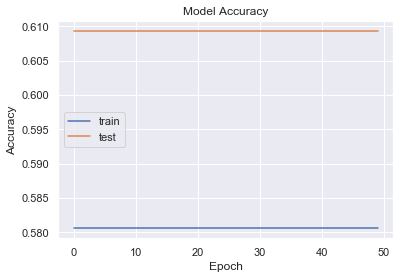

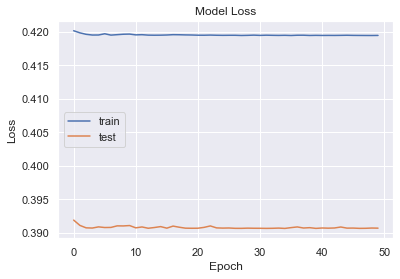

In [130]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='center left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='center left')
plt.show()